In [1]:
pip install PyCap

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


### REDCap project DEMO link: https://redcap.vanderbilt.edu/redcap_v10.3.0/index.php?pid=117680
### Let's create a new record in the REDCap, Arm1 :Endoscopy Subject event.

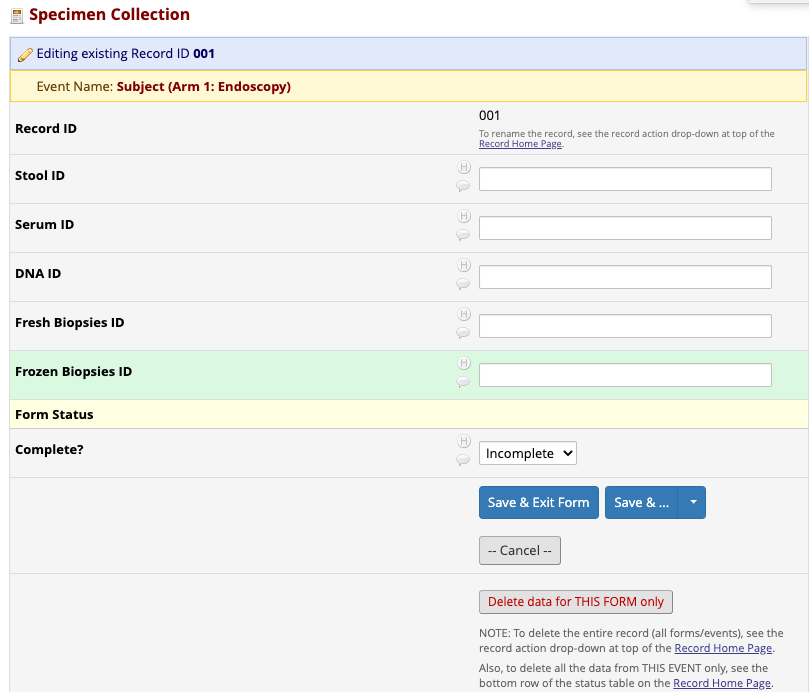

In [3]:
from IPython.display import Image
Image(filename='img/NewSubjectRecord.png') 

In [7]:
import redcap
project = redcap.Project('https://redcap.vanderbilt.edu/api/', 'PLEASE USE YOUR OWN REDCap API_KEY')


# 'Print' a full pack of barcode, 
# record_id, redcap_event_name, test_stool_id, test_serum_id, test_dna_id, test_fresh_id, test_frozen_id
# are pre-defined REDCap variables.

subject_id = '001';
to_import = [{'record_id':subject_id,
              'redcap_event_name':'subject_arm_1',
              'test_stool_id': 'GCA%sST' % subject_id, 
              'test_serum_id': 'GCA%sSR' % subject_id, 
              'test_dna_id': 'GCA%sDNA' % subject_id, 
              'test_fresh_id': 'GCA%sFRESH' % subject_id,
              'test_frozen_id': 'GCA%sFROZEN' % subject_id}]

project.import_records(to_import);

### The record 001 form is filled in with new barcodes.

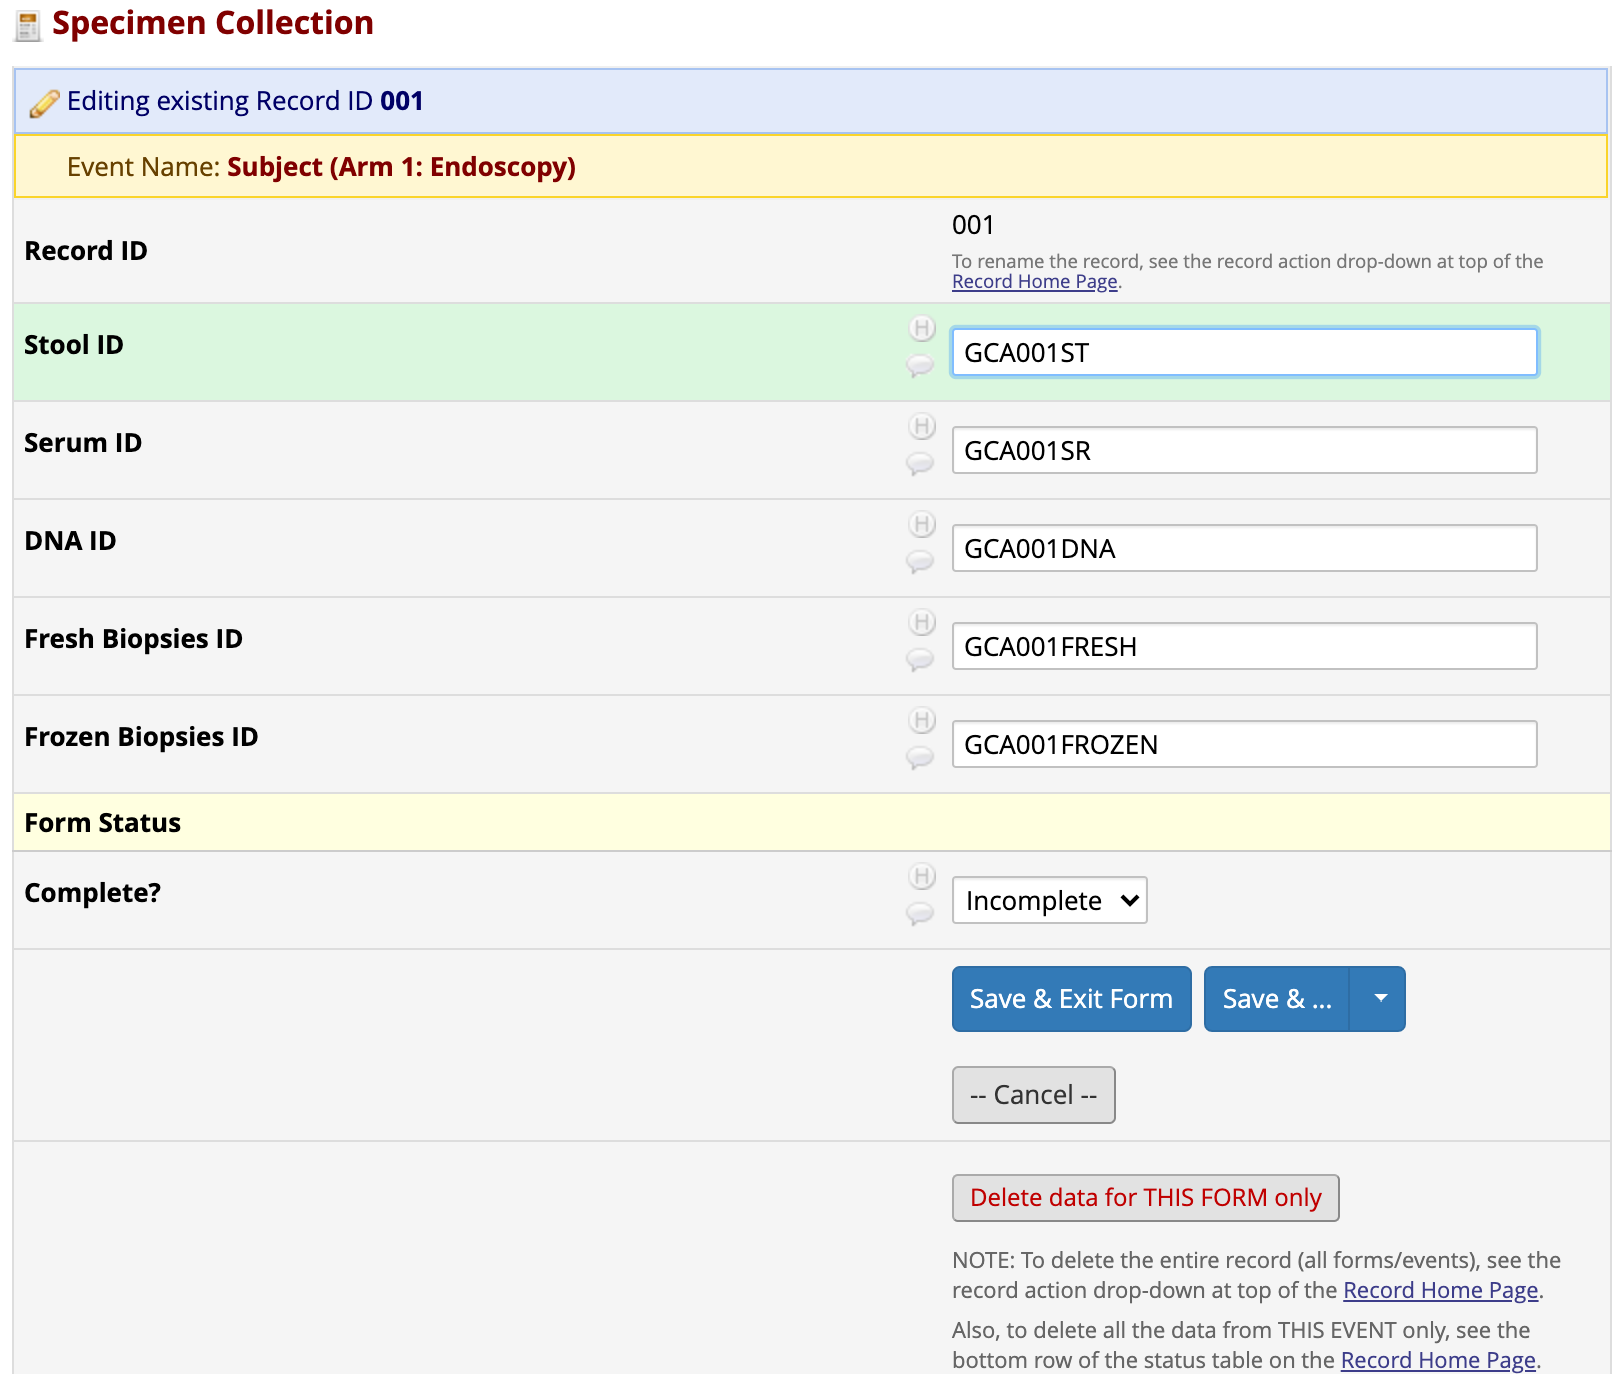

In [8]:
Image(filename='img/Fill_Specimen_Collecton_Form.png') 

In [9]:
### We also want to record all 'print' action in the barcode tuple table. We've just printed 5 barcode.

In [10]:
from datetime import datetime

curTime = datetime.now()
cur_date = curTime.strftime('%Y-%m-%d %H:%M')
    
to_import = [{'record_id':'action1',
              'redcap_event_name':'action_tuple_table_arm_2',
              'barcode_sample_id': 'GCA%sST' % subject_id,
              'barcode_action_date': str(cur_date),
             'barcode_action_type': 'printed'}]

project.import_records(to_import);

to_import = [{'record_id':'action2',
              'redcap_event_name':'action_tuple_table_arm_2',
              'barcode_sample_id': 'GCA%sSR' % subject_id,
              'barcode_action_date': str(cur_date),
             'barcode_action_type': 'printed'}]

project.import_records(to_import);

to_import = [{'record_id':'action3',
              'redcap_event_name':'action_tuple_table_arm_2',
              'barcode_sample_id': 'GCA%sDNA' % subject_id,
              'barcode_action_date': str(cur_date),
             'barcode_action_type': 'printed'}]

project.import_records(to_import);

to_import = [{'record_id':'action4',
              'redcap_event_name':'action_tuple_table_arm_2',
              'barcode_sample_id': 'GCA%sFRESH' % subject_id,
              'barcode_action_date': str(cur_date),
             'barcode_action_type': 'printed'}]

project.import_records(to_import);

to_import = [{'record_id':'action5',
              'redcap_event_name':'action_tuple_table_arm_2',
              'barcode_sample_id': 'GCA%sFROZEN' % subject_id,
              'barcode_action_date': str(cur_date),
              'barcode_action_type': 'printed'}]

project.import_records(to_import);

### Five printed actions got recorded. Similarirly, you can try above way to record further barcode actions, please remember to make the action ID incrementally. 

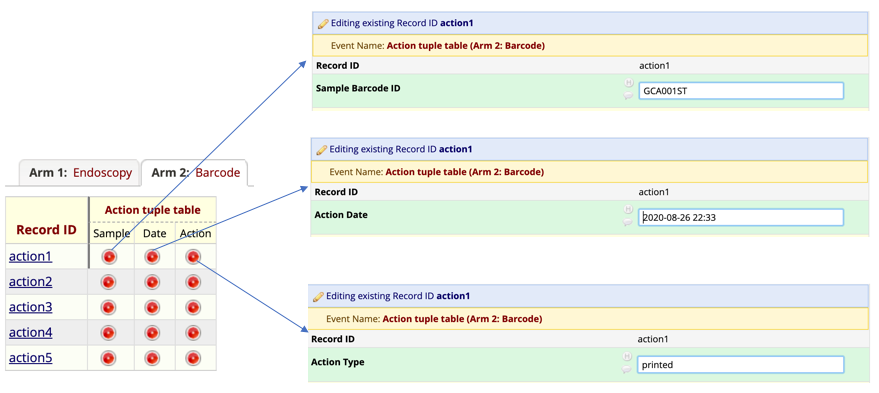

In [11]:
Image(filename='img/PrintedActions.png') 

In [15]:
# To get all action list
import pandas as pd
from IPython.display import display, HTML

result = project.export_records(events=['action_tuple_table_arm_2'])
data = pd.DataFrame.from_dict(result)
display(HTML(data.to_html()))

,record_id,redcap_event_name,test_stool_id,test_serum_id,test_dna_id,test_fresh_id,test_frozen_id,barcode_sample_id,barcode_action_date,barcode_action_type
0,action1,action_tuple_table_arm_2,,,,,,GCA001ST,2020-08-26 23:07,printed
1,action2,action_tuple_table_arm_2,,,,,,GCA001SR,2020-08-26 23:07,printed
2,action3,action_tuple_table_arm_2,,,,,,GCA001DNA,2020-08-26 23:07,printed
3,action4,action_tuple_table_arm_2,,,,,,GCA001FRESH,2020-08-26 23:07,printed
4,action5,action_tuple_table_arm_2,,,,,,GCA001FROZEN,2020-08-26 23:07,printed
